In [1]:
import pandas as pd
import numpy as np

In [2]:
sales_train_validation = pd.read_csv("./datasets/Walmart/sales_train_validation.csv")

In [3]:
sales_train_validation.head(5)

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,3,0,1,1,1,3,0,1,1
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,2,1,1,1,0,1,1,1
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,5,4,1,0,1,3,7,2
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,1,0,1,1,2,2,2,4


In [4]:
d_cols = [c for c in sales_train_validation.columns if 'd_' in c] # sales data columns

In [5]:
stacked = pd.melt(sales_train_validation, id_vars=['id','item_id','dept_id','cat_id','store_id','state_id'], value_vars=d_cols)
stacked.head(10)

,id,item_id,dept_id,cat_id,store_id,state_id,variable,value
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0
5,HOBBIES_1_006_CA_1_validation,HOBBIES_1_006,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0
6,HOBBIES_1_007_CA_1_validation,HOBBIES_1_007,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0
7,HOBBIES_1_008_CA_1_validation,HOBBIES_1_008,HOBBIES_1,HOBBIES,CA_1,CA,d_1,12
8,HOBBIES_1_009_CA_1_validation,HOBBIES_1_009,HOBBIES_1,HOBBIES,CA_1,CA,d_1,2
9,HOBBIES_1_010_CA_1_validation,HOBBIES_1_010,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0


In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 6))
sns.lineplot(data=stacked[stacked["item_id"]=="HOBBIES_1_001"], x='variable',y='value')

In [7]:
stacked['variable'] = stacked['variable'].map(lambda x: int(x.lstrip('d_')))
stacked.head(5)

,id,item_id,dept_id,cat_id,store_id,state_id,variable,value
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,1,0
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,1,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,1,0
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,1,0
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,1,0


In [8]:
stacked = stacked.sort_values('variable')

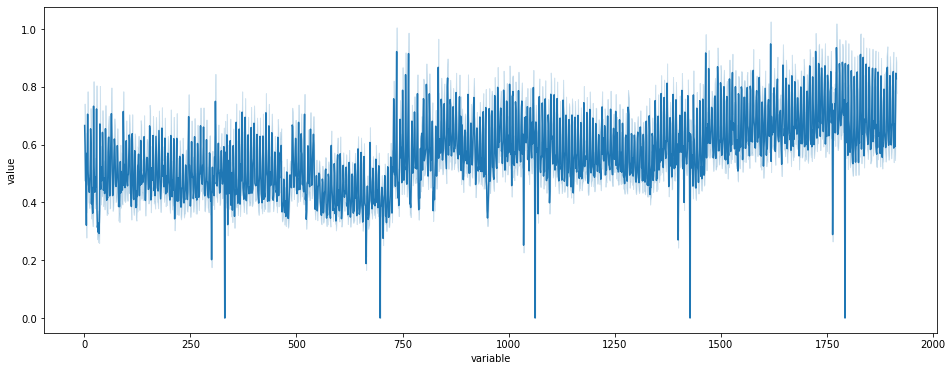

In [9]:
plt.figure(figsize=(16, 6))
sns.lineplot(data=stacked[stacked["cat_id"]=="HOBBIES"], x='variable',y='value')

In [44]:
stacked['MA'] = stacked['value'].rolling(window=7).mean()
stacked['MA_300'] = stacked['value'].rolling(300, center=True).mean()
stacked['EW_300'] = stacked['value'].ewm(600, adjust=False).mean()

In [15]:
stacked.head(5)

,id,item_id,dept_id,cat_id,store_id,state_id,variable,value,MA
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,1,0,NaN
20334,FOODS_2_214_TX_3_validation,FOODS_2_214,FOODS_2,FOODS,TX_3,TX,1,0,NaN
20333,FOODS_2_213_TX_3_validation,FOODS_2_213,FOODS_2,FOODS,TX_3,TX,1,0,NaN
20332,FOODS_2_212_TX_3_validation,FOODS_2_212,FOODS_2,FOODS,TX_3,TX,1,5,NaN
20331,FOODS_2_211_TX_3_validation,FOODS_2_211,FOODS_2,FOODS,TX_3,TX,1,1,NaN


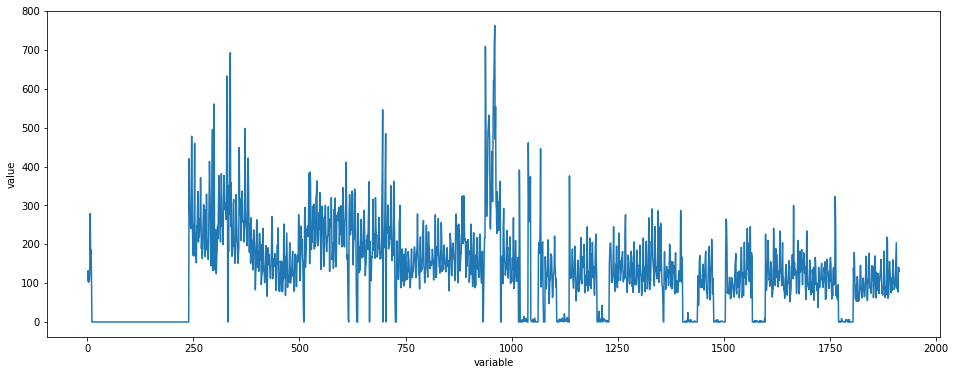

In [16]:
plt.figure(figsize=(16, 6))
sns.lineplot(data=stacked[stacked["id"]=="FOODS_3_090_CA_3_validation"], x='variable',y='value')

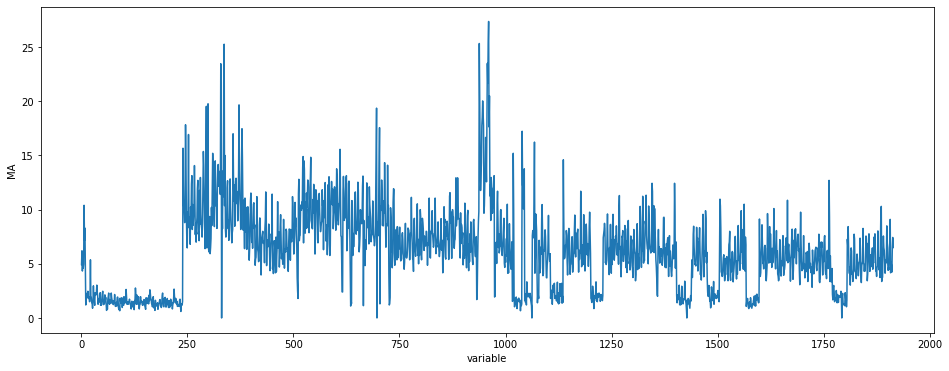

In [22]:
plt.figure(figsize=(16, 6))
sns.lineplot(data=stacked[stacked["id"]=="FOODS_3_090_CA_3_validation"], x='variable',y='MA')

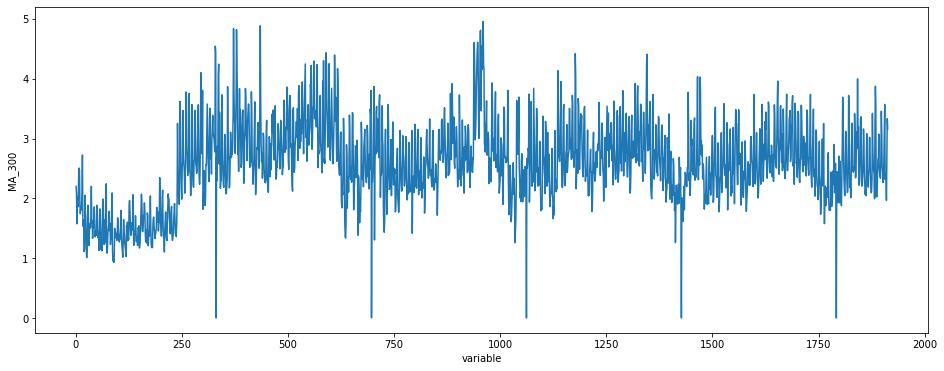

In [35]:
plt.figure(figsize=(16, 6))
sns.lineplot(data=stacked[stacked["id"]=="FOODS_3_090_CA_3_validation"], x='variable',y='MA_300')

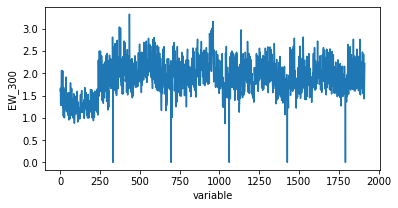

In [41]:
plt.figure(figsize=(16, 6))
sns.lineplot(data=stacked[stacked["id"]=="FOODS_3_090_CA_3_validation"], x='variable',y='EW_300')

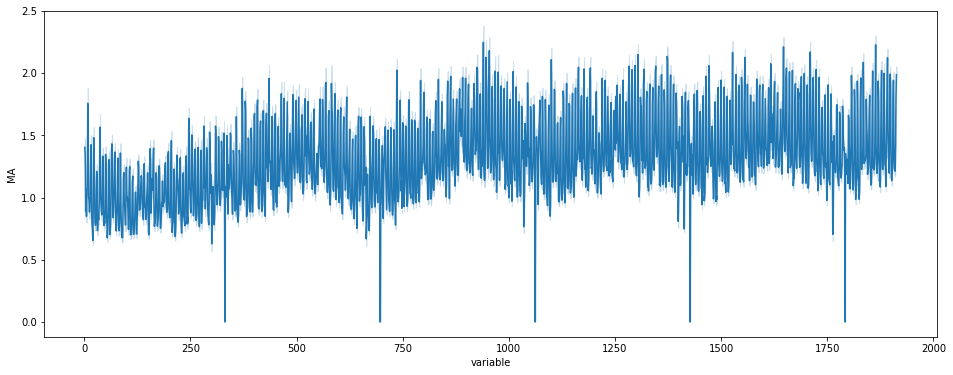

In [45]:
plt.figure(figsize=(16, 6))
sns.lineplot(data=stacked[stacked["store_id"]=="CA_1"], x='variable',y='MA')